In [153]:
import pandas as pd
import numpy as np
#import matplotlib.pyplot as plt
#import seaborn as sns

# from ydata_profiling import ProfileReport

In [154]:
df = pd.read_parquet(r"..\data\FAOSTAT\clean_data\all_tables_processed\full_country_dataset_v2_imputed.parquet")

In [155]:
pd.set_option('display.max_columns', None)
print(df.shape)

(12096, 78)


In [156]:
df.head(5)

,Area,Year,Area Code,Total_Energy_Emissions_(CO2)_kt,Total_Energy_Energy_use_in_agriculture_TJ,Cropland_organic_soils_Area_ha,Cropland_organic_soils_Emissions_(CO2)_kt,Cropland_organic_soils_Net_stock_change_(C)_kt,Drained_organic_soils_Area_ha,Drained_organic_soils_Emissions_(CO2)_kt,Drained_organic_soils_Net_stock_change_(C)_kt,Grassland_organic_soils_Area_ha,Grassland_organic_soils_Emissions_(CO2)_kt,Grassland_organic_soils_Net_stock_change_(C)_kt,Forestland_Area_1000_ha,Forestland_Net_emissions/removals_(CO2)_(Forest_land)_kt,Net_Forest_conversion_Area_1000_ha,Net_Forest_conversion_Net_emissions/removals_(CO2)_(Forest_land)_kt,Agrifood_Systems_Waste_Disposal_Emissions_(CO2eq)_(AR5)_kt_x,Energy_Use_(Pre-_and_Post-Production)_Emissions_(CO2eq)_(AR5)_kt,Energy_Use_(Pre-_and_Post-Production)_Energy_Use_(Total)_TJ,Fertilizers_Manufacturing_Emissions_(CO2eq)_(AR5)_kt_x,Food_Household_Consumption_Emissions_(CO2eq)_(AR5)_kt_x,Food_Household_Consumption_Energy_Use_(Total)_TJ,Food_Packaging_Emissions_(CO2eq)_(AR5)_kt_x,Food_Packaging_Energy_Use_(Total)_TJ,Food_Processing_Emissions_(CO2eq)_(AR5)_kt_x,Food_Processing_Energy_Use_(Total)_TJ,Food_Retail_Emissions_(CO2eq)_(AR5)_kt_x,Food_Retail_Energy_Use_(Total)_TJ,Food_Transport_Emissions_(CO2eq)_(AR5)_kt_x,Food_Transport_Energy_Use_(Total)_TJ,Pesticides_Manufacturing_Emissions_(CO2eq)_(AR5)_kt_x,Pre-_and_Post-_Production_Emissions_(CO2eq)_(AR5)_kt_x,Pre-_and_Post-_Production_Energy_Use_(Total)_TJ,Solid_Food_Waste_Emissions_(CO2eq)_(AR5)_kt,Agricultural_Soils_Emissions_(CO2eq)_(AR5)_kt,Agrifood_Systems_Waste_Disposal_Emissions_(CO2eq)_(AR5)_kt_y,Agrifood_systems_Emissions_(CO2eq)_(AR5)_kt,Burning_-_Crop_residues_Emissions_(CO2eq)_(AR5)_kt,Crop_Residues_Emissions_(CO2eq)_(AR5)_kt,Drained_organic_soils_Emissions_(CO2eq)_(AR5)_kt,Emissions_from_crops_Emissions_(CO2eq)_(AR5)_kt,Emissions_from_livestock_Emissions_(CO2eq)_(AR5)_kt,Emissions_on_agricultural_land_Emissions_(CO2eq)_(AR5)_kt,Enteric_Fermentation_Emissions_(CO2eq)_(AR5)_kt,Farm_gate_Emissions_(CO2eq)_(AR5)_kt,Fertilizers_Manufacturing_Emissions_(CO2eq)_(AR5)_kt_y,Fires_in_humid_tropical_forests_Emissions_(CO2eq)_(AR5)_kt,Fires_in_organic_soils_Emissions_(CO2eq)_(AR5)_kt,Food_Household_Consumption_Emissions_(CO2eq)_(AR5)_kt_y,Food_Packaging_Emissions_(CO2eq)_(AR5)_kt_y,Food_Processing_Emissions_(CO2eq)_(AR5)_kt_y,Food_Retail_Emissions_(CO2eq)_(AR5)_kt_y,Food_Transport_Emissions_(CO2eq)_(AR5)_kt_y,Forest_fires_Emissions_(CO2eq)_(AR5)_kt,Forestland_Emissions_(CO2eq)_(AR5)_kt,Land_Use_change_Emissions_(CO2eq)_(AR5)_kt,Manure_Management_Emissions_(CO2eq)_(AR5)_kt,Manure_applied_to_Soils_Emissions_(CO2eq)_(AR5)_kt,Manure_left_on_Pasture_Emissions_(CO2eq)_(AR5)_kt,Net_Forest_conversion_Emissions_(CO2eq)_(AR5)_kt,Pesticides_Manufacturing_Emissions_(CO2eq)_(AR5)_kt_y,Pre-_and_Post-_Production_Emissions_(CO2eq)_(AR5)_kt_y,Rice_Cultivation_Emissions_(CO2eq)_(AR5)_kt,Savanna_fires_Emissions_(CO2eq)_(AR5)_kt,Synthetic_Fertilizers_Emissions_(CO2eq)_(AR5)_kt,Waste_Emissions_(CO2eq)_(AR5)_kt,Country_area_Area_1000_ha,Population_-_Est._&_Proj._Total_Population_-_Both_sexes_1000_No,Gross_Domestic_Product_Annual_growth_US$_per_capita_%,Gross_Domestic_Product_Value_US$_million_USD,Gross_Domestic_Product_Value_US$_per_capita_USD,Total_Energy_Emissions_(CH4_CO2eq)_kt,Total_Energy_Emissions_(N2O_CO2eq)_kt,Cropland_organic_soils_Emissions_(N2O_CO2eq)_kt,Drained_organic_soils_Emissions_(N2O_CO2eq)_kt,Grassland_organic_soils_Emissions_(N2O_CO2eq)_kt
0,Armenia,1980,1.0,734.6265,7017.1128,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,334.312,76.3667,0.309,54.2254,250.194146,585.400799,7215.848159,NaN,354.528585,5664.804371,20.131263,158.305788,73.326261,561.6,101.2014,831.138,36.293303,6.072,0.228261,835.903219,7215.848159,79.589584,544.8665,250.1941,2997.3446,2.5811,25.8905,0.0,28.4716,1251.471,2161.4414,751.24,2107.216,NaN,0.0,0.0,354.5286,20.1313,73.3263,101.2014,36.2933,0.8903,76.3667,54.2254,64.0145,33.337,402.8795,54.2254,0.2283,835.9032,NaN,4.2975,82.7595,606.9

In [157]:
#profile = ProfileReport(df, title="Full Country V2 Report", minimal= True, explorative=True)
#profile.to_notebook_iframe()

# Feature Ingenieering & Pre-Processing

## Eliminar columnas Iguales/duplicadas

### Agrifood_Systems_Waste_Disposal_Emissions_(CO2eq)_(AR5)_kt_x y 

In [158]:
def diferencia_columnas(df, cols):
    return df[cols[0]] - df[cols[1]]

In [159]:
def eliminarYrenombrar(df, cols):
    
    # Cambia el nombre de la primera columna, eliminando los últimos 2 caracteres
    first_column = cols[0]
    new_name = first_column[:-2]
    df = df.rename(columns={first_column: new_name})
    
    # Elimina la segunda columna
    second_column = cols[1]
    df = df.drop(columns=[second_column])
    
    return df

In [160]:
cols = ["Agrifood_Systems_Waste_Disposal_Emissions_(CO2eq)_(AR5)_kt_x", "Agrifood_Systems_Waste_Disposal_Emissions_(CO2eq)_(AR5)_kt_y"]
diferencia_columnas(df, cols)

0        0.000046
1        0.000046
2        0.000046
3        0.000046
4        0.000046
           ...   
12091   -0.000031
12092   -0.000034
12093   -0.000028
12094    0.000022
12095   -0.000023
Length: 12096, dtype: float64

In [161]:
# son iguales, elimino una y renombro la otra
df = eliminarYrenombrar(df, cols)

### Fertilizers_Manufacturing_Emissions_(CO2eq)_(AR5)_kt_x y

In [162]:
cols = ["Fertilizers_Manufacturing_Emissions_(CO2eq)_(AR5)_kt_x", "Fertilizers_Manufacturing_Emissions_(CO2eq)_(AR5)_kt_y"]
diferencia_columnas(df, cols)

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
           ...   
12091   -0.000028
12092   -0.000015
12093    0.000044
12094   -0.000016
12095   -0.000003
Length: 12096, dtype: float64

In [163]:
# son iguales, elimino una y renombro la otra
df = eliminarYrenombrar(df, cols)

### Food_Household_Consumption_Emissions_(CO2eq)_(AR5)_kt_x y

In [164]:
cols = ["Food_Household_Consumption_Emissions_(CO2eq)_(AR5)_kt_x", "Food_Household_Consumption_Emissions_(CO2eq)_(AR5)_kt_y"]
diferencia_columnas(df, cols)

0       -0.000015
1       -0.000015
2       -0.000015
3       -0.000015
4       -0.000015
           ...   
12091   -0.000035
12092   -0.000023
12093   -0.000007
12094   -0.000042
12095   -0.000039
Length: 12096, dtype: float64

In [165]:
# son iguales, elimino una y renombro la otra
df = eliminarYrenombrar(df, cols)

### Food_Packaging_Emissions_(CO2eq)_(AR5)_kt_x y

In [166]:
cols = ["Food_Packaging_Emissions_(CO2eq)_(AR5)_kt_x", "Food_Packaging_Emissions_(CO2eq)_(AR5)_kt_y"]
diferencia_columnas(df, cols)

0       -0.000037
1       -0.000037
2       -0.000037
3       -0.000037
4       -0.000037
           ...   
12091    0.000024
12092   -0.000006
12093    0.000037
12094   -0.000040
12095   -0.000012
Length: 12096, dtype: float64

In [167]:
# son iguales, elimino una y renombro la otra
df = eliminarYrenombrar(df, cols)

### Food_Processing_Emissions_(CO2eq)_(AR5)_kt_x y

In [168]:
cols = ["Food_Processing_Emissions_(CO2eq)_(AR5)_kt_x", "Food_Processing_Emissions_(CO2eq)_(AR5)_kt_y"]
diferencia_columnas(df, cols)

0       -0.000039
1       -0.000039
2       -0.000039
3       -0.000039
4       -0.000039
           ...   
12091    0.000031
12092    0.000031
12093    0.000039
12094    0.000000
12095   -0.000018
Length: 12096, dtype: float64

In [169]:
# son iguales, elimino una y renombro la otra
df = eliminarYrenombrar(df, cols)

### Food_Retail_Emissions_(CO2eq)_(AR5)_kt_x y

In [170]:
cols = ["Food_Retail_Emissions_(CO2eq)_(AR5)_kt_x", "Food_Retail_Emissions_(CO2eq)_(AR5)_kt_y"]
diferencia_columnas(df, cols)

0        0.000000
1        0.000000
2        0.000000
3        0.000000
4        0.000000
           ...   
12091    0.000025
12092   -0.000039
12093   -0.000036
12094    0.000006
12095    0.000016
Length: 12096, dtype: float64

In [171]:
df = eliminarYrenombrar(df, cols)

### Food_Transport_Emissions_(CO2eq)_(AR5)_kt_x y

In [172]:
cols = ["Food_Transport_Emissions_(CO2eq)_(AR5)_kt_x", "Food_Transport_Emissions_(CO2eq)_(AR5)_kt_y"]
diferencia_columnas(df, cols)

0        0.000003
1        0.000003
2        0.000003
3        0.000003
4        0.000003
           ...   
12091   -0.000014
12092   -0.000036
12093   -0.000027
12094   -0.000004
12095   -0.000004
Length: 12096, dtype: float64

In [173]:
df = eliminarYrenombrar(df, cols)

### Pesticides_Manufacturing_Emissions_(CO2eq)_(AR5)_kt_x y

In [174]:
cols = ["Pesticides_Manufacturing_Emissions_(CO2eq)_(AR5)_kt_x", "Pesticides_Manufacturing_Emissions_(CO2eq)_(AR5)_kt_y"]
diferencia_columnas(df, cols)

0       -0.000039
1       -0.000039
2       -0.000039
3       -0.000039
4       -0.000039
           ...   
12091    0.000023
12092    0.000002
12093   -0.000004
12094   -0.000007
12095   -0.000035
Length: 12096, dtype: float64

In [175]:
df = eliminarYrenombrar(df, cols)

### Pre-_and_Post-_Production_Emissions_(CO2eq)_(AR5)_kt_x y


In [176]:
cols = ['Pre-_and_Post-_Production_Emissions_(CO2eq)_(AR5)_kt_x','Pre-_and_Post-_Production_Emissions_(CO2eq)_(AR5)_kt_y',]
diferencia_columnas(df, cols)

0        0.000019
1        0.000019
2        0.000019
3        0.000019
4        0.000019
           ...   
12091   -0.000005
12092   -0.000019
12093    0.000018
12094    0.000019
12095   -0.000018
Length: 12096, dtype: float64

In [177]:
df = eliminarYrenombrar(df, cols)

In [178]:
df.shape

(12096, 69)

## Totales, agrupar y sumar columnas

### 1.Total_Energy_Emissions_CO2_kt

In [179]:
def sum_and_print_columns(df, cols, new_col_name):
    df[new_col_name] = df[cols].sum(axis=1)
    print(f"Nueva columna '{new_col_name}':")
    # print(df[[new_col_name]])
    return df

In [180]:
cols = ['Total_Energy_Emissions_(CO2)_kt',
        'Total_Energy_Emissions_(CH4_CO2eq)_kt',
        'Total_Energy_Emissions_(N2O_CO2eq)_kt']

new_col_name1 = 'Total_Energy_Emissions_CO2_kt'

df = sum_and_print_columns(df, cols, new_col_name1)

# dropeo las columnas que lo componen, ya que corresponden a otras emisiones, convertidas a CO2eq
df = df.drop(cols, axis=1)

# Resultado
df[['Total_Energy_Emissions_CO2_kt']]

Nueva columna 'Total_Energy_Emissions_CO2_kt':


,Total_Energy_Emissions_CO2_kt
0,740.2100
1,740.2100
2,740.2100
3,740.2100
4,740.2100
...,...
12091,258071.0304
12092,256804.3351
12093,257077.5072
12094,248882.1550


### 2.Total_Organic_Soils_Emissions_CO2eq_kt

In [181]:
cols = ['Cropland_organic_soils_Emissions_(CO2)_kt',
    'Cropland_organic_soils_Emissions_(N2O_CO2eq)_kt',
    'Drained_organic_soils_Emissions_(CO2)_kt',
    'Drained_organic_soils_Emissions_(N2O_CO2eq)_kt',
    'Drained_organic_soils_Emissions_(CO2eq)_(AR5)_kt',
    'Grassland_organic_soils_Emissions_(CO2)_kt',
    'Grassland_organic_soils_Emissions_(N2O_CO2eq)_kt']

new_col_name2 = 'Total_Organic_Soils_Emissions_CO2eq_kt'

df = sum_and_print_columns(df, cols, new_col_name2)

# dropeo las columnas que lo componen, ya que corresponden a otras emisiones, convertidas a CO2eq
df = df.drop(cols, axis=1)

# Resultado
df[['Total_Organic_Soils_Emissions_CO2eq_kt']]

Nueva columna 'Total_Organic_Soils_Emissions_CO2eq_kt':


,Total_Organic_Soils_Emissions_CO2eq_kt
0,0.0000
1,0.0000
2,0.0000
3,0.0000
4,0.0000
...,...
12091,899387.2122
12092,904203.0536
12093,905783.1705
12094,906609.3793


### 3.Total_Area_For_Crops_Production_ha

In [182]:
"""
Le pregunté a Claude, sobre cual de esos suelos se usa para plantar arroz, y me dijo basicamente que ninguno... nos estará faltando mergear algún suelo? 

        Basándome en la información proporcionada y mi conocimiento general sobre agricultura, ninguno de esos tipos de suelo es típicamente el ideal para el cultivo de arroz. Vamos a analizarlos:

        1. "Cropland_organic_soils_Area_ha" (Área de suelos orgánicos de tierras de cultivo):
        Los suelos orgánicos son ricos en materia orgánica, pero no son los más comunes para el cultivo de arroz.

        2. 'Drained_organic_soils_Area_ha' (Área de suelos orgánicos drenados):
        Estos son suelos orgánicos que han sido drenados, lo cual es lo opuesto a lo que el arroz necesita.

        3. 'Grassland_organic_soils_Area_ha' (Área de suelos orgánicos de pastizales):
        Estos son suelos orgánicos típicamente usados para pastos, no para cultivos de arroz.

        El arroz, especialmente el arroz de inundación (que es el más común), se cultiva típicamente en:

        - Suelos de textura fina (arcillosos o limosos)
        - Áreas que pueden ser inundadas o que retienen bien el agua
        - Suelos con un pH ligeramente ácido a neutro (5.5-7.0)
        - Áreas planas o terrazas

        Los suelos orgánicos mencionados en tu lista no son la elección típica para el cultivo de arroz. El arroz necesita condiciones de inundación o al menos suelos muy húmedos, y aunque 
        los suelos orgánicos pueden retener bien la humedad, no son la opción más común para este cultivo.

        Si estás buscando datos específicos sobre áreas de cultivo de arroz, probablemente necesitarías una categoría diferente, algo como "Paddy fields" (campos de arroz) o 
        "Wetland rice cultivation areas" (áreas de cultivo de arroz en humedales).
"""


cols = ["Cropland_organic_soils_Area_ha",
        'Drained_organic_soils_Area_ha',
        'Grassland_organic_soils_Area_ha']

new_col_name3 = "Total_Area_For_Crops_Production_ha"

df = sum_and_print_columns(df, cols, new_col_name3)

# # las No DROPEO, y las mantengo por si fuese interesante para el estudio de suelos para arroz. 
# # dropeo las columnas que lo componen, en pos de simplificar el DF. 
# df = df.drop(cols, axis=1)

# Resultado
df[["Total_Area_For_Crops_Production_ha", 
    "Cropland_organic_soils_Area_ha",
    'Drained_organic_soils_Area_ha',
    'Grassland_organic_soils_Area_ha']]


Nueva columna 'Total_Area_For_Crops_Production_ha':


,Total_Area_For_Crops_Production_ha,Cropland_organic_soils_Area_ha,Drained_organic_soils_Area_ha,Grassland_organic_soils_Area_ha
0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
3,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
4,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
...,...,...,...,...
12091,1.954664e+07,5.540027e+06,9.773318e+06,4.233291e+06
12092,1.965024e+07,5.575342e+06,9.825118e+06,4.249776e+06
12093,1.968351e+07,5.587309e+06,9.841753e+06,4.254444e+06
12094,1.970058e+07,5.594658e+06,9.850291e+06,4.255633e+06


### 4. Total_Net_stock_change_kt" <<- Ver nota de Total_Net_stock_change_kt

In [183]:
cols = ['Drained_organic_soils_Net_stock_change_(C)_kt',
        'Cropland_organic_soils_Net_stock_change_(C)_kt',
        'Grassland_organic_soils_Net_stock_change_(C)_kt',]

new_col_name4 = 'Total_Net_stock_change_kt'

df = sum_and_print_columns(df, cols, new_col_name4)

# # No dropeo por si resulta interesante analizar el detalle
# # dropeo las columnas que lo componen, ya que corresponden a otras emisiones, convertidas a CO2eq
# df = df.drop(cols, axis=1)

# Resultado
df[['Total_Net_stock_change_kt', 
    'Drained_organic_soils_Net_stock_change_(C)_kt',
    'Cropland_organic_soils_Net_stock_change_(C)_kt',
    'Grassland_organic_soils_Net_stock_change_(C)_kt',]]

Nueva columna 'Total_Net_stock_change_kt':


,Total_Net_stock_change_kt,Drained_organic_soils_Net_stock_change_(C)_kt,Cropland_organic_soils_Net_stock_change_(C)_kt,Grassland_organic_soils_Net_stock_change_(C)_kt
0,0.0000,0.0000,0.0000,0.0000
1,0.0000,0.0000,0.0000,0.0000
2,0.0000,0.0000,0.0000,0.0000
3,0.0000,0.0000,0.0000,0.0000
4,0.0000,0.0000,0.0000,0.0000
...,...,...,...,...
12091,139525.9454,69762.9727,45140.5160,24622.4567
12092,140263.3192,70131.6596,45416.7786,24714.8810
12093,140514.9876,70257.4938,45526.8812,24730.6126
12094,140640.2252,70320.1126,45584.4290,24735.6836


### 5. Total_Fertilizers_Emissions_CO2_kt <<- Emisiones totales de la produccion de fertilizantes y pesticidas

In [184]:
cols = ['Fertilizers_Manufacturing_Emissions_(CO2eq)_(AR5)_kt',
        'Pesticides_Manufacturing_Emissions_(CO2eq)_(AR5)_kt',
        'Synthetic_Fertilizers_Emissions_(CO2eq)_(AR5)_kt',]

new_col_name5 = 'Total_Fertilizers_Emissions_CO2_kt'

df = sum_and_print_columns(df, cols, new_col_name5)

# dropeo las columnas que lo componen. Asumo que el analisis que se va a realizar es de los emisiones totales de fertilizantes
df = df.drop(cols, axis=1)

# Resultado
df[['Total_Fertilizers_Emissions_CO2_kt']]

Nueva columna 'Total_Fertilizers_Emissions_CO2_kt':


,Total_Fertilizers_Emissions_CO2_kt
0,82.987761
1,82.987761
2,82.987761
3,82.987761
4,82.987761
...,...
12091,294377.896295
12092,288270.553087
12093,285544.670340
12094,292441.443677


### 6. Pre-_and_Post-_Production_Energy_Use_(Total)_TJ
    

In [185]:
cols = ['Food_Household_Consumption_Energy_Use_(Total)_TJ',
        'Food_Packaging_Energy_Use_(Total)_TJ',
        'Food_Processing_Energy_Use_(Total)_TJ',
        'Food_Transport_Energy_Use_(Total)_TJ',
        'Food_Retail_Energy_Use_(Total)_TJ',
        'Pre-_and_Post-_Production_Energy_Use_(Total)_TJ', # <<<--- ES EL TOTAL, suma de las anteriores 
          ]

df = df.drop("Energy_Use_(Pre-_and_Post-Production)_Energy_Use_(Total)_TJ", axis=1)

# no dropeo... por si resulta interesante ver mas detalles. Aunque el análisis va mas por el lado de generacion de CO2 que de consumo de energía
# df = df.drop(cols, axis=1)

# Resultado
df[['Pre-_and_Post-_Production_Energy_Use_(Total)_TJ',
    'Food_Household_Consumption_Energy_Use_(Total)_TJ',
    'Food_Packaging_Energy_Use_(Total)_TJ',
    'Food_Processing_Energy_Use_(Total)_TJ',
    'Food_Transport_Energy_Use_(Total)_TJ',
    'Food_Retail_Energy_Use_(Total)_TJ',
    ]]

,Pre-_and_Post-_Production_Energy_Use_(Total)_TJ,Food_Household_Consumption_Energy_Use_(Total)_TJ,Food_Packaging_Energy_Use_(Total)_TJ,Food_Processing_Energy_Use_(Total)_TJ,Food_Transport_Energy_Use_(Total)_TJ,Food_Retail_Energy_Use_(Total)_TJ
0,7.215848e+03,5.664804e+03,158.305788,5.616000e+02,6.072000,8.311380e+02
1,7.215848e+03,5.664804e+03,158.305788,5.616000e+02,6.072000,8.311380e+02
2,7.215848e+03,5.664804e+03,158.305788,5.616000e+02,6.072000,8.311380e+02
3,7.215848e+03,5.664804e+03,158.305788,5.616000e+02,6.072000,8.311380e+02
4,7.215848e+03,5.664804e+03,158.305788,5.616000e+02,6.072000,8.311380e+02
...,...,...,...,...,...,...
12091,1.143751e+07,2.867398e+06,858163.548713,2.909333e+06,16741.550427,4.785871e+06
12092,1.167498e+07,2.942628e+06,858164.361984,2.961376e+06,17363.533841,4.895444e+06
12093,1.179637e+07,2.940877e+06,858692.565306,2.854339e+06,18002.886090,5.124457e+06
12094,1.121277e+07,2.934496e+06,839495.685145,2.916428e+06,16876.377129,4.505474e+06


### 7. FoodReatail_Total_Emissions_CO2_kt <<- Emisiones totales del food retail

In [186]:
cols = ['Food_Household_Consumption_Emissions_(CO2eq)_(AR5)_kt',
        'Food_Packaging_Emissions_(CO2eq)_(AR5)_kt',
        'Food_Processing_Emissions_(CO2eq)_(AR5)_kt',
        'Food_Retail_Emissions_(CO2eq)_(AR5)_kt',
        'Food_Transport_Emissions_(CO2eq)_(AR5)_kt',
        'Pre-_and_Post-_Production_Emissions_(CO2eq)_(AR5)_kt', #<<<--- ES EL TOTAL , suma de las anteriores
        ]

df = df.drop('Energy_Use_(Pre-_and_Post-Production)_Emissions_(CO2eq)_(AR5)_kt', axis=1)

# Resultado
df[['Pre-_and_Post-_Production_Emissions_(CO2eq)_(AR5)_kt',
    'Food_Household_Consumption_Emissions_(CO2eq)_(AR5)_kt',
    'Food_Packaging_Emissions_(CO2eq)_(AR5)_kt',
    'Food_Processing_Emissions_(CO2eq)_(AR5)_kt',
    'Food_Retail_Emissions_(CO2eq)_(AR5)_kt',
    'Food_Transport_Emissions_(CO2eq)_(AR5)_kt']]

,Pre-_and_Post-_Production_Emissions_(CO2eq)_(AR5)_kt,Food_Household_Consumption_Emissions_(CO2eq)_(AR5)_kt,Food_Packaging_Emissions_(CO2eq)_(AR5)_kt,Food_Processing_Emissions_(CO2eq)_(AR5)_kt,Food_Retail_Emissions_(CO2eq)_(AR5)_kt,Food_Transport_Emissions_(CO2eq)_(AR5)_kt
0,8.359032e+02,354.528585,20.131263,73.326261,101.201400,36.293303
1,8.359032e+02,354.528585,20.131263,73.326261,101.201400,36.293303
2,8.359032e+02,354.528585,20.131263,73.326261,101.201400,36.293303
3,8.359032e+02,354.528585,20.131263,73.326261,101.201400,36.293303
4,8.359032e+02,354.528585,20.131263,73.326261,101.201400,36.293303
...,...,...,...,...,...,...
12091,1.580558e+06,254015.993565,71710.220024,315255.071231,272844.508825,279427.616486
12092,1.570115e+06,251720.460977,69745.190094,313311.202231,268695.461261,282325.334264
12093,1.535246e+06,240439.927693,66823.239937,292584.239839,269571.095264,282191.902873
12094,1.487048e+06,241374.350858,64678.995760,296320.642100,249450.247706,249394.345396


### 8. Total_Waste_Emissions_CO2_kt <<- Emisiones totales de los desperdios.

In [187]:
"""  
Estas columnas se refieren a diferentes tipos de emisiones de gases de efecto invernadero relacionadas con residuos, expresadas en equivalentes de CO2 (CO2eq). Vamos a desglosar cada una:

'Agrifood_Systems_Waste_Disposal_Emissions_(CO2eq)_(AR5)_kt':

Emisiones provenientes de la disposición de residuos en sistemas agroalimentarios.
Incluye emisiones de la gestión de residuos en toda la cadena de suministro de alimentos.


'Solid_Food_Waste_Emissions_(CO2eq)_(AR5)_kt':

Emisiones específicamente de residuos sólidos de alimentos.
Probablemente incluye emisiones de vertederos y compostaje de residuos alimentarios.


'Waste_Emissions_(CO2eq)_(AR5)_kt':

Emisiones totales de todos los tipos de residuos.
Probablemente incluye residuos municipales, industriales y otros tipos de residuos.



Puntos importantes:

(CO2eq): Indica que las emisiones están expresadas en equivalentes de CO2. Esto permite comparar diferentes gases de efecto invernadero (como metano y óxido nitroso) en una misma escala.
(AR5): Se refiere al Quinto Informe de Evaluación (Fifth Assessment Report) del IPCC. Indica que se están utilizando los factores de conversión y metodologías más recientes para calcular las equivalencias de CO2.
kt: Kilotoneladas (miles de toneladas).

Estas columnas son importantes porque:

Ayudan a cuantificar el impacto climático de los residuos en diferentes sectores.
Permiten identificar áreas clave para la mitigación de emisiones en la gestión de residuos.
Proporcionan datos para políticas de reducción de residuos y mejora de la eficiencia en sistemas alimentarios.

"""

cols = ['Agrifood_Systems_Waste_Disposal_Emissions_(CO2eq)_(AR5)_kt',
        'Solid_Food_Waste_Emissions_(CO2eq)_(AR5)_kt',
        'Waste_Emissions_(CO2eq)_(AR5)_kt',]

new_col_name8 = 'Total_Waste_Emissions_CO2_kt'

df = sum_and_print_columns(df, cols, new_col_name8)

# dropeo las columnas que lo componen. 
df = df.drop(cols, axis=1)

# Resultado
df[['Total_Waste_Emissions_CO2_kt']]

Nueva columna 'Total_Waste_Emissions_CO2_kt':


,Total_Waste_Emissions_CO2_kt
0,936.758730
1,936.758730
2,936.758730
3,936.758730
4,936.758730
...,...
12091,958313.565382
12092,962541.146098
12093,959687.415834
12094,954011.302791


### 9.Total_Fires_Emissions_CO2_kt <<- Emisiones totales de los incendios, en diferentes tipos de ecosistemas.  
    

In [188]:
cols = ['Fires_in_humid_tropical_forests_Emissions_(CO2eq)_(AR5)_kt',
        'Fires_in_organic_soils_Emissions_(CO2eq)_(AR5)_kt',
        'Forest_fires_Emissions_(CO2eq)_(AR5)_kt',
        'Burning_-_Crop_residues_Emissions_(CO2eq)_(AR5)_kt',
        'Savanna_fires_Emissions_(CO2eq)_(AR5)_kt',]

new_col_name9 = 'Total_Fires_Emissions_CO2_kt'

df = sum_and_print_columns(df, cols, new_col_name9)

# # No dropeo quizá sea interesante para hacer alguna grafica  
# df = df.drop(cols, axis=1)

# Resultado
df[['Total_Fires_Emissions_CO2_kt', 
    'Fires_in_humid_tropical_forests_Emissions_(CO2eq)_(AR5)_kt',
    'Fires_in_organic_soils_Emissions_(CO2eq)_(AR5)_kt',
    'Forest_fires_Emissions_(CO2eq)_(AR5)_kt',
    'Burning_-_Crop_residues_Emissions_(CO2eq)_(AR5)_kt',
    'Savanna_fires_Emissions_(CO2eq)_(AR5)_kt',]]

Nueva columna 'Total_Fires_Emissions_CO2_kt':


,Total_Fires_Emissions_CO2_kt,Fires_in_humid_tropical_forests_Emissions_(CO2eq)_(AR5)_kt,Fires_in_organic_soils_Emissions_(CO2eq)_(AR5)_kt,Forest_fires_Emissions_(CO2eq)_(AR5)_kt,Burning_-_Crop_residues_Emissions_(CO2eq)_(AR5)_kt,Savanna_fires_Emissions_(CO2eq)_(AR5)_kt
0,7.7689,0.0000,0.0,0.8903,2.5811,4.2975
1,7.7689,0.0000,0.0,0.8903,2.5811,4.2975
2,7.7689,0.0000,0.0,0.8903,2.5811,4.2975
3,7.7689,0.0000,0.0,0.8903,2.5811,4.2975
4,7.7689,0.0000,0.0,0.8903,2.5811,4.2975
...,...,...,...,...,...,...
12091,82044.5904,569.8560,0.0,9571.9973,7380.3511,64522.3860
12092,79486.9772,739.2467,0.0,8957.6853,7273.8121,62516.2331
12093,70079.5294,802.0626,0.0,25720.6328,7190.1476,36366.6864
12094,43636.6120,893.4585,0.0,19384.7460,7229.4692,16128.9383


### 10. Total_manure_Emissions_CO2_kt <<- Emisiones debido a la industria ganadera
    

In [189]:
""" 
Estas columnas están relacionadas con las emisiones de gases de efecto invernadero en el sector agrícola, específicamente en la ganadería. Vamos a desglosar cada una:

'Manure_Management_Emissions_(CO2eq)_(AR5)_kt':

Emisiones de CO2 equivalente provenientes del manejo del estiércol.
Incluye emisiones de la recolección, almacenamiento y tratamiento del estiércol animal.


'Manure_applied_to_Soils_Emissions_(CO2eq)_(AR5)_kt':

Emisiones de CO2 equivalente del estiércol aplicado a los suelos como fertilizante.
Ocurre cuando el estiércol se usa para mejorar la fertilidad del suelo.


'Manure_left_on_Pasture_Emissions_(CO2eq)_(AR5)_kt':

Emisiones de CO2 equivalente del estiércol dejado en los pastizales por los animales.
Representa las emisiones del estiércol depositado directamente por los animales en pastoreo.


'Enteric_Fermentation_Emissions_(CO2eq)_(AR5)_kt':

Emisiones de CO2 equivalente de la fermentación entérica.
Proviene principalmente de la digestión de los rumiantes (como vacas y ovejas).


'Farm_gate_Emissions_(CO2eq)_(AR5)_kt':

Emisiones totales de CO2 equivalente a nivel de granja.
Probablemente incluye todas las emisiones directas de las actividades agrícolas en la granja.



Notas adicionales:

"(CO2eq)" significa que las emisiones de diferentes gases de efecto invernadero se han convertido a su equivalente en CO2 para facilitar la comparación.
"(AR5)" se refiere al Quinto Informe de Evaluación (Fifth Assessment Report) del IPCC, que proporciona los factores de conversión más recientes para calcular el CO2 equivalente.
"kt" significa kilotoneladas (miles de toneladas).

"""
cols = ['Manure_Management_Emissions_(CO2eq)_(AR5)_kt',
        'Manure_applied_to_Soils_Emissions_(CO2eq)_(AR5)_kt',
        'Manure_left_on_Pasture_Emissions_(CO2eq)_(AR5)_kt',
        'Enteric_Fermentation_Emissions_(CO2eq)_(AR5)_kt',
        'Farm_gate_Emissions_(CO2eq)_(AR5)_kt']

new_col_name10 = 'Total_manure_Emissions_CO2_kt'

df = sum_and_print_columns(df, cols, new_col_name10)

# # No dropeo quizá sea interesante para hacer alguna grafica  
# df = df.drop(cols, axis=1)

# Resultado
df[['Total_manure_Emissions_CO2_kt',
    'Manure_Management_Emissions_(CO2eq)_(AR5)_kt',
    'Manure_applied_to_Soils_Emissions_(CO2eq)_(AR5)_kt',
    'Manure_left_on_Pasture_Emissions_(CO2eq)_(AR5)_kt',
    'Enteric_Fermentation_Emissions_(CO2eq)_(AR5)_kt',
    'Farm_gate_Emissions_(CO2eq)_(AR5)_kt']]

Nueva columna 'Total_manure_Emissions_CO2_kt':


,Total_manure_Emissions_CO2_kt,Manure_Management_Emissions_(CO2eq)_(AR5)_kt,Manure_applied_to_Soils_Emissions_(CO2eq)_(AR5)_kt,Manure_left_on_Pasture_Emissions_(CO2eq)_(AR5)_kt,Enteric_Fermentation_Emissions_(CO2eq)_(AR5)_kt,Farm_gate_Emissions_(CO2eq)_(AR5)_kt
0,3.358687e+03,64.0145,33.3370,402.8795,751.2400,2.107216e+03
1,3.358687e+03,64.0145,33.3370,402.8795,751.2400,2.107216e+03
2,3.358687e+03,64.0145,33.3370,402.8795,751.2400,2.107216e+03
3,3.358687e+03,64.0145,33.3370,402.8795,751.2400,2.107216e+03
4,3.358687e+03,64.0145,33.3370,402.8795,751.2400,2.107216e+03
...,...,...,...,...,...,...
12091,2.719156e+06,152032.5315,50412.1690,129332.8790,585408.0988,1.801970e+06
12092,2.723359e+06,152958.4756,50509.3445,130871.7870,587560.4028,1.801459e+06
12093,2.685376e+06,153124.2943,50457.5105,130154.6175,584107.4736,1.767532e+06
12094,2.652702e+06,152731.2925,50390.1740,129087.5420,579242.6892,1.741250e+06


# bla

c:\Users\afernandez\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


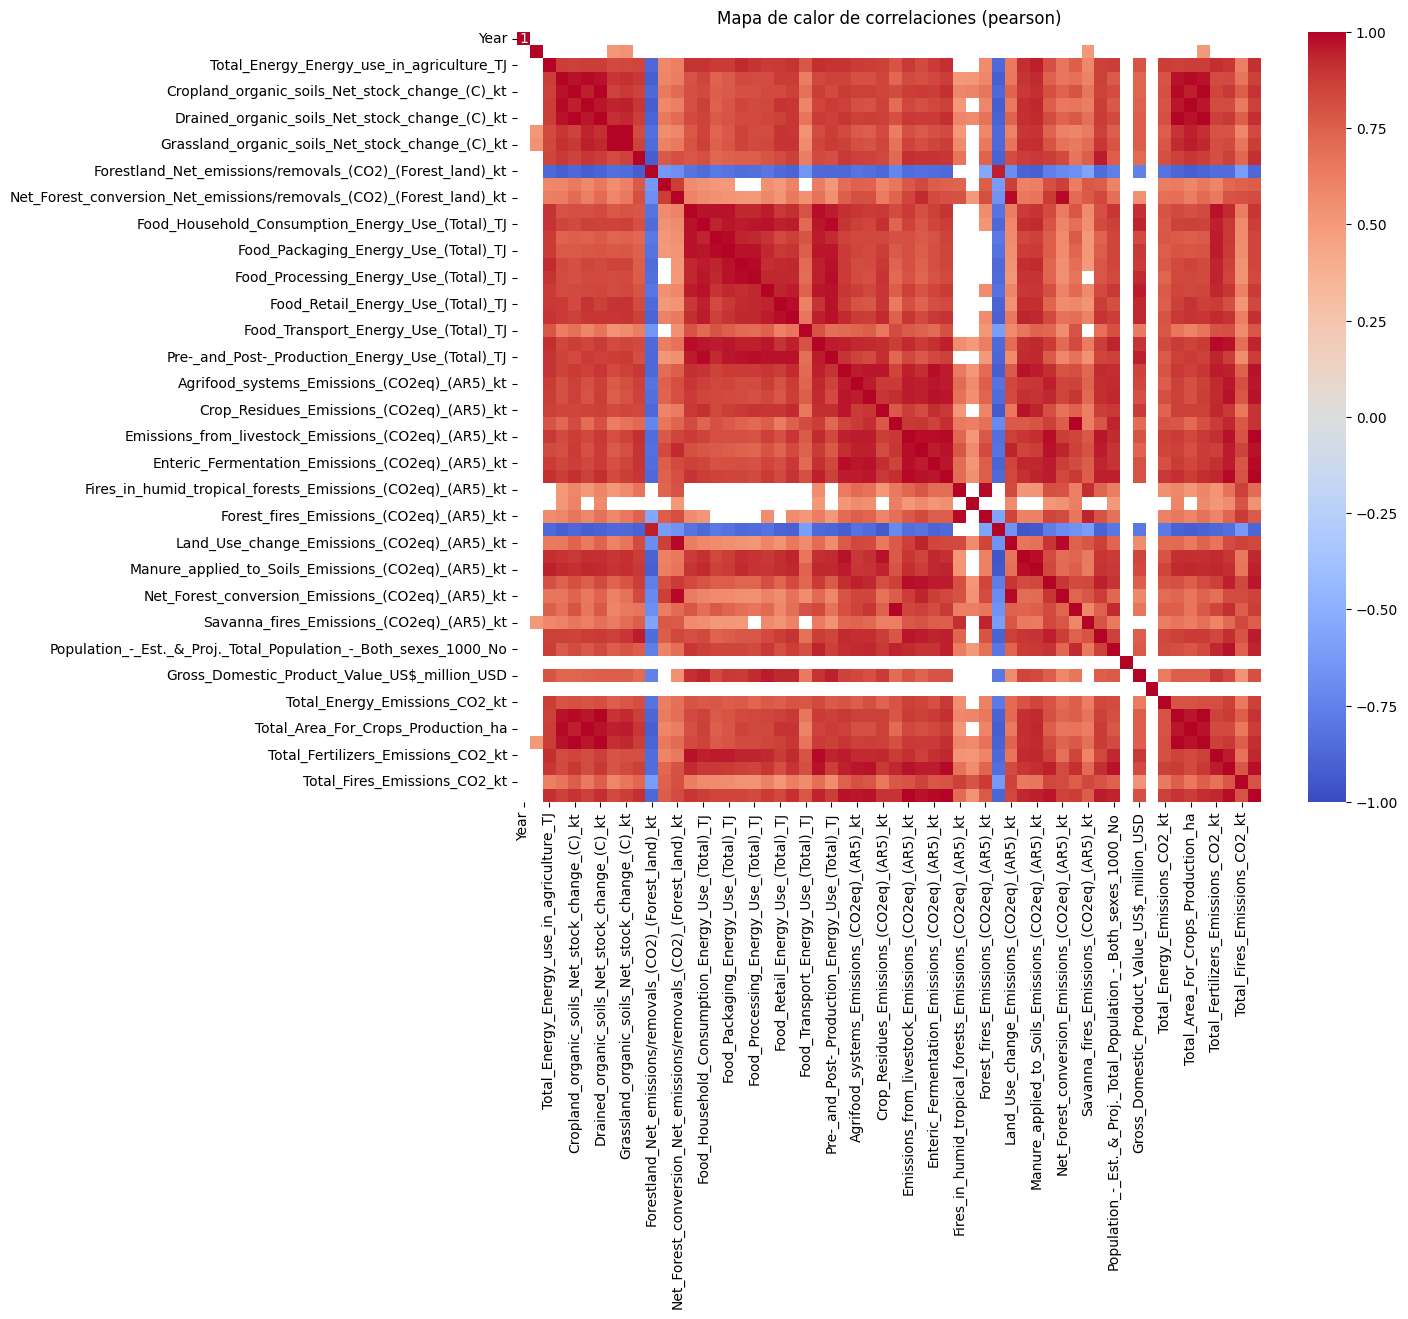

                                                    Year  Area Code  \
Year                                                 1.0        NaN   
Area Code                                            NaN   1.000000   
Total_Energy_Energy_use_in_agriculture_TJ            NaN        NaN   
Cropland_organic_soils_Area_ha                       NaN        NaN   
Cropland_organic_soils_Net_stock_change_(C)_kt       NaN        NaN   
Drained_organic_soils_Area_ha                        NaN        NaN   
Drained_organic_soils_Net_stock_change_(C)_kt        NaN        NaN   
Grassland_organic_soils_Area_ha                      NaN   0.512599   
Grassland_organic_soils_Net_stock_change_(C)_kt      NaN   0.533477   
Forestland_Area_1000_ha                              NaN        NaN   
Forestland_Net_emissions/removals_(CO2)_(Forest...   NaN        NaN   
Net_Forest_conversion_Area_1000_ha                   NaN        NaN   
Net_Forest_conversion_Net_emissions/removals_(C...   NaN        NaN   
Food_H

In [190]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def calculate_correlations(df, columns=None, method='pearson', threshold=None, plot=False):
    """
    Calcula las correlaciones entre las columnas de un DataFrame.
    
    Parámetros:
    df (pandas.DataFrame): El DataFrame de entrada.
    columns (list): Lista de columnas para calcular la correlación. Si es None, usa todas las columnas numéricas.
    method (str): Método de correlación ('pearson', 'spearman', o 'kendall').
    threshold (float): Si se proporciona, solo muestra correlaciones por encima de este valor absoluto.
    plot (bool): Si es True, genera un mapa de calor de las correlaciones.
    
    Retorna:
    pandas.DataFrame: Matriz de correlación.
    """
    # Seleccionar columnas
    if columns is None:
        columns = df.select_dtypes(include=['float64', 'int64']).columns
    
    # Calcular correlaciones
    corr_matrix = df[columns].corr(method=method)
    
    # Aplicar umbral si se especifica
    if threshold is not None:
        corr_matrix = corr_matrix.where(abs(corr_matrix) > threshold, other=None)
    
    # Generar mapa de calor si se solicita
    if plot:
        plt.figure(figsize=(12, 10))
        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
        plt.title(f'Mapa de calor de correlaciones ({method})')
        plt.show()
    
    return corr_matrix

# Ejemplo de uso
# Asumiendo que tienes un DataFrame llamado 'df'
correlations = calculate_correlations(df, method='pearson', threshold=0.5, plot=True)
print(correlations)

In [191]:
def calculate_top_correlations(df, n=10, method='pearson'):
    corr_matrix = df.corr(method=method)
    top_corr = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
                           .stack()
                           .sort_values(ascending=False)
                           .head(n))
    return top_corr

In [192]:
df.head()

,Area,Year,Area Code,Total_Energy_Energy_use_in_agriculture_TJ,Cropland_organic_soils_Area_ha,Cropland_organic_soils_Net_stock_change_(C)_kt,Drained_organic_soils_Area_ha,Drained_organic_soils_Net_stock_change_(C)_kt,Grassland_organic_soils_Area_ha,Grassland_organic_soils_Net_stock_change_(C)_kt,Forestland_Area_1000_ha,Forestland_Net_emissions/removals_(CO2)_(Forest_land)_kt,Net_Forest_conversion_Area_1000_ha,Net_Forest_conversion_Net_emissions/removals_(CO2)_(Forest_land)_kt,Food_Household_Consumption_Emissions_(CO2eq)_(AR5)_kt,Food_Household_Consumption_Energy_Use_(Total)_TJ,Food_Packaging_Emissions_(CO2eq)_(AR5)_kt,Food_Packaging_Energy_Use_(Total)_TJ,Food_Processing_Emissions_(CO2eq)_(AR5)_kt,Food_Processing_Energy_Use_(Total)_TJ,Food_Retail_Emissions_(CO2eq)_(AR5)_kt,Food_Retail_Energy_Use_(Total)_TJ,Food_Transport_Emissions_(CO2eq)_(AR5)_kt,Food_Transport_Energy_Use_(Total)_TJ,Pre-_and_Post-_Production_Emissions_(CO2eq)_(AR5)_kt,Pre-_and_Post-_Production_Energy_Use_(Total)_TJ,Agricultural_Soils_Emissions_(CO2eq)_(AR5)_kt,Agrifood_systems_Emissions_(CO2eq)_(AR5)_kt,Burning_-_Crop_residues_Emissions_(CO2eq)_(AR5)_kt,Crop_Residues_Emissions_(CO2eq)_(AR5)_kt,Emissions_from_crops_Emissions_(CO2eq)_(AR5)_kt,Emissions_from_livestock_Emissions_(CO2eq)_(AR5)_kt,Emissions_on_agricultural_land_Emissions_(CO2eq)_(AR5)_kt,Enteric_Fermentation_Emissions_(CO2eq)_(AR5)_kt,Farm_gate_Emissions_(CO2eq)_(AR5)_kt,Fires_in_humid_tropical_forests_Emissions_(CO2eq)_(AR5)_kt,Fires_in_organic_soils_Emissions_(CO2eq)_(AR5)_kt,Forest_fires_Emissions_(CO2eq)_(AR5)_kt,Forestland_Emissions_(CO2eq)_(AR5)_kt,Land_Use_change_Emissions_(CO2eq)_(AR5)_kt,Manure_Management_Emissions_(CO2eq)_(AR5)_kt,Manure_applied_to_Soils_Emissions_(CO2eq)_(AR5)_kt,Manure_left_on_Pasture_Emissions_(CO2eq)_(AR5)_kt,Net_Forest_conversion_Emissions_(CO2eq)_(AR5)_kt,Rice_Cultivation_Emissions_(CO2eq)_(AR5)_kt,Savanna_fires_Emissions_(CO2eq)_(AR5)_kt,Country_area_Area_1000_ha,Population_-_Est._&_Proj._Total_Population_-_Both_sexes_1000_No,Gross_Domestic_Product_Annual_growth_US$_per_capita_%,Gross_Domestic_Product_Value_US$_million_USD,Gross_Domestic_Product_Value_US$_per_capita_USD,Total_Energy_Emissions_CO2_kt,Total_Organic_Soils_Emissions_CO2eq_kt,Total_Area_For_Crops_Production_ha,Total_Net_stock_change_kt,Total_Fertilizers_Emissions_CO2_kt,Total_Waste_Emissions_CO2_kt,Total_Fires_Emissions_CO2_kt,Total_manure_Emissions_CO2_kt
0,Armenia,1980,1.0,7017.1128,0.0,0.0,0.0,0.0,0.0,0.0,334.312,76.3667,0.309,54.2254,354.528585,5664.804371,20.131263,158.305788,73.326261,561.6,101.2014,831.138,36.293303,6.072,835.903219,7215.848159,544.8665,2997.3446,2.5811,25.8905,28.4716,1251.471,2161.4414,751.24,2107.216,0.0,0.0,0.8903,76.3667,54.2254,64.0145,33.337,402.8795,54.2254,NaN,4.2975,2974.0,3574.555,-10.233892,2301.720664,647.179931,740.21,0.0,0.0,0.0,82.987761,936.75873,7.7689,3358.687
1,Armenia,1981,1.0,7017.1128,0.0,0.0,0.0,0.0,0.0,0.0,334.312,76.3667,0.309,54.2254,354.528585,5664.804371,20.131263,158.305788,73.326261,561.6,101.2014,831.138,36.293303,6.072,835.903219,7215.848159,544.8665,2997.3446,2.5811,25.8905,28.4716,1251.471,2161.4414,751.24,2107.216,0.0,0.0,0.8903,76.3667,54.2254,64.0145,33.337,402.8795,54.2254,NaN,4.2975,2974.0,3574.555,-10.233892,2301.720664,647.179931,740.21,0.0,0.0,0.0,82.987761,936.75873,7.7689,3358.687
2,Armenia,1982,1.0,7017.1128,0.0,0.0,0.0,0.0,0.0,0.0,334.312,76.3667,0.309,54.2254,354.528585,5664.804371,20.131263,158.305788,73.326261,561.6,101.2014,831.138,36.293303,6.072,835.903219,7215.848159,544.8665,2997.3446,2.5811,25.8905,28.4716,1251.471,2161.4414,751.24,2107.216,0.0,0.0,0.8903,76.3667,54.2254,64.0145,33.337,402.8795,54.2254,NaN,4.2975,2974.0,3574.555,-10.233892,2301.720664,647.179931,740.21,0.0,0.0,0.0,82.987761,936.75873,7.7689,3358.687
3,Armenia,1983,1.0,7017.1128,0.0,0.0,0.0,0.0,0.0,0.0,334.312,76.3667,0.309,54.2254,354.528585,5664.804371,20.131263,158.305788,73.326261,561.6,101.2014,831.138,36.293303,6.072,835.903219,7215.848159,544.8665,2997.

In [193]:
df_corr = df.copy()
df_corr.drop("Area", axis=1, inplace=True)

In [194]:
top_correlations = calculate_top_correlations(df_corr, n=40)
print(top_correlations)

Drained_organic_soils_Net_stock_change_(C)_kt                        Total_Net_stock_change_kt                                    1.000000
Drained_organic_soils_Area_ha                                        Total_Area_For_Crops_Production_ha                           0.999123
Farm_gate_Emissions_(CO2eq)_(AR5)_kt                                 Total_manure_Emissions_CO2_kt                                0.995989
Emissions_from_crops_Emissions_(CO2eq)_(AR5)_kt                      Rice_Cultivation_Emissions_(CO2eq)_(AR5)_kt                  0.994796
Cropland_organic_soils_Net_stock_change_(C)_kt                       Drained_organic_soils_Net_stock_change_(C)_kt                0.994369
                                                                     Total_Net_stock_change_kt                                    0.994369
Grassland_organic_soils_Area_ha                                      Grassland_organic_soils_Net_stock_change_(C)_kt              0.993358
Emissions_from_livestock_Em

In [199]:
df2 = df[["Area", "Year", 'Land_Use_change_Emissions_(CO2eq)_(AR5)_kt']]

df2[df2["Area"] == "World"]

,Area,Year,Land_Use_change_Emissions_(CO2eq)_(AR5)_kt
10542,World,1980,4.674757e+06
10543,World,1981,4.674757e+06
10544,World,1982,4.674757e+06
10545,World,1983,4.674757e+06
10546,World,1984,4.674757e+06
10547,World,1985,4.674757e+06
10548,World,1986,4.674757e+06
10549,World,1987,4.674757e+06
10550,World,1988,4.674757e+06
10551,World,1989,4.674757e+06
